In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras
import glob, natsort

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.3.0


In [2]:
generator_1 = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 5,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    validation_split=0.2)

generator_2 = ImageDataGenerator(rescale=1./255)

#test_generator = ImageDataGenerator(rescale=1./255)

In [3]:
train_generator = generator_1.flow_from_directory(
    './mnist_png/train',
    target_size=(28, 28),
    class_mode='categorical',
    batch_size=64,
    shuffle=True, 
    seed=77,
    subset='training')


test_generator = generator_2.flow_from_directory(
    './mnist_png/test',
    target_size=(28, 28),
    class_mode='categorical',
    batch_size=64)



val_generator = generator_1.flow_from_directory(
    './mnist_png/train',
    target_size=(28, 28),
    class_mode='categorical',
    batch_size=64,
    shuffle=True, 
    seed=77,
    subset='validation')

Found 48004 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 11996 images belonging to 10 classes.


In [4]:
x_train, y_train = next(train_generator)

print(x_train.shape)

(64, 28, 28, 3)


In [5]:
x_val, y_val = next(val_generator)

print(x_val.shape)

(64, 28, 28, 3)


(28, 28, 3)
(28, 28, 3)


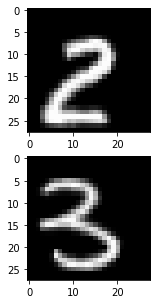

In [6]:
q = 10

plt.figure(figsize = (5, 5))

plt.subplot(211)
plt.imshow(x_train[q])
print(x_train[q].shape)

plt.subplot(212)
plt.imshow(x_val[q])
print(x_val[q].shape)

from keras import models, layers

model = models.Sequential()

model.add(layers.Flatten(input_shape=(28, 28, 3)))
model.add(layers.Dense(28, activation = 'relu'))
model.add(layers.Dense(14, activation = 'relu'))
model.add(layers.Dense(10))

In [7]:
from keras import models, layers

model = models.Sequential()

# layers.SeparableConv2D
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(28, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#model.add(layers.Flatten())  # 이전 CNN 레이어에서 나온 3차원 배열은 1차원으로 뽑아줍니다
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(14, activation='relu'))
keras.layers.Dropout(0.5),
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 28)        7084      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 28)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 14)                406       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [10]:
history = model.fit(train_generator,
        steps_per_epoch=40,
        epochs=100,
        validation_data=val_generator,
        validation_steps=20)

Epoch 1/100
40/40 [==============================] - 9s 216ms/step - loss: 2.2817 - accuracy: 0.1227 - val_loss: 2.2647 - val_accuracy: 0.1117
Epoch 2/100
40/40 [==============================] - 8s 197ms/step - loss: 2.2136 - accuracy: 0.2262 - val_loss: 2.1769 - val_accuracy: 0.2117
Epoch 3/100
40/40 [==============================] - 7s 183ms/step - loss: 2.1322 - accuracy: 0.2207 - val_loss: 2.0759 - val_accuracy: 0.2133
Epoch 4/100
40/40 [==============================] - 7s 186ms/step - loss: 2.0166 - accuracy: 0.2652 - val_loss: 1.9614 - val_accuracy: 0.2406
Epoch 5/100
40/40 [==============================] - 7s 184ms/step - loss: 1.9215 - accuracy: 0.2961 - val_loss: 1.8880 - val_accuracy: 0.3469
Epoch 6/100
40/40 [==============================] - 8s 188ms/step - loss: 1.8470 - accuracy: 0.3461 - val_loss: 1.8875 - val_accuracy: 0.3187
Epoch 7/100
40/40 [==============================] - 7s 185ms/step - loss: 1.7723 - accuracy: 0.3742 - val_loss: 1.7345 - val_accuracy: 0.4008

Epoch 58/100
40/40 [==============================] - 5s 129ms/step - loss: 0.6013 - accuracy: 0.8156 - val_loss: 0.6641 - val_accuracy: 0.7688
Epoch 59/100
40/40 [==============================] - 5s 127ms/step - loss: 0.5938 - accuracy: 0.8129 - val_loss: 0.5556 - val_accuracy: 0.8336
Epoch 60/100
40/40 [==============================] - 6s 149ms/step - loss: 0.6243 - accuracy: 0.8064 - val_loss: 0.5218 - val_accuracy: 0.8359
Epoch 61/100
40/40 [==============================] - 6s 141ms/step - loss: 0.5606 - accuracy: 0.8336 - val_loss: 0.6360 - val_accuracy: 0.7883
Epoch 62/100
40/40 [==============================] - 5s 117ms/step - loss: 0.5529 - accuracy: 0.8281 - val_loss: 0.6391 - val_accuracy: 0.8102
Epoch 63/100
40/40 [==============================] - 5s 118ms/step - loss: 0.5696 - accuracy: 0.8238 - val_loss: 0.5159 - val_accuracy: 0.8453
Epoch 64/100
40/40 [==============================] - 5s 119ms/step - loss: 0.5460 - accuracy: 0.8359 - val_loss: 0.5510 - val_accuracy:

In [11]:
model.evaluate(test_generator)

157/157 [==============================] - 48s 304ms/step - loss: 0.3380 - accuracy: 0.8956


[0.33798566460609436, 0.8956000208854675]

In [13]:
import json

history_dict = history.history
json.dump(history_dict, open("./mnist.json", 'w'))

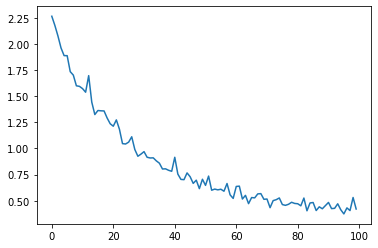

In [15]:
plt.plot(history.history['val_loss'])

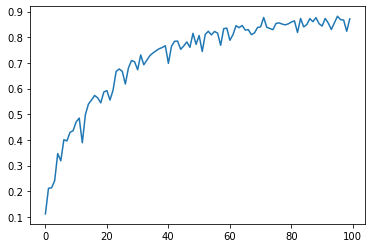

In [16]:
plt.plot(history.history['val_accuracy'])

In [19]:
model.save('./mnist_test_model')
model.save('./mnist_test_model.h5')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./mnist_test_model\assets


In [28]:
model_data = models.Sequential()

model_data.load_weights('./mnist_test_model')
model_data.summary()

OpError: 